Coefficients: 
 [ 938.23786125]
Mean squared error: 2548.07
Variance score: 0.47


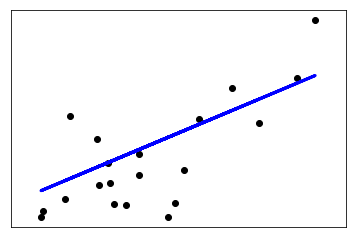

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets, linear_model

# Load the diabetes dataset
diabetes = datasets.load_diabetes()


# Use only one feature
diabetes_X = diabetes.data[:, np.newaxis, 2]

# Split the data into training/testing sets
diabetes_X_train = diabetes_X[:-20]
diabetes_X_test = diabetes_X[-20:]

# Split the targets into training/testing sets
diabetes_y_train = diabetes.target[:-20]
diabetes_y_test = diabetes.target[-20:]

# Create linear regression object
regr = linear_model.LinearRegression()

# Train the model using the training sets
regr.fit(diabetes_X_train, diabetes_y_train)

# The coefficients
print('Coefficients: \n', regr.coef_)
# The mean squared error
print("Mean squared error: %.2f"
      % np.mean((regr.predict(diabetes_X_test) - diabetes_y_test) ** 2))
# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % regr.score(diabetes_X_test, diabetes_y_test))

# Plot outputs
plt.scatter(diabetes_X_test, diabetes_y_test,  color='black')
plt.plot(diabetes_X_test, regr.predict(diabetes_X_test), color='blue',
         linewidth=3)

plt.xticks(())
plt.yticks(())

plt.show()

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:27: MatplotlibDeprecationWarning: pyplot.hold is deprecated.
    Future behavior will be consistent with the long-time default:
    plot commands add elements without first clearing the
    Axes and/or Figure.
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\__init__.py:917: UserWarning: axes.hold is deprecated. Please remove it from your matplotlibrc and/or style files.
  warnings.warn(self.msg_depr_set % key)
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\rcsetup.py:152: UserWarning: axes.hold is deprecated, will be removed in 3.0
  warnings.warn("axes.hold is deprecated, will be removed in 3.0")


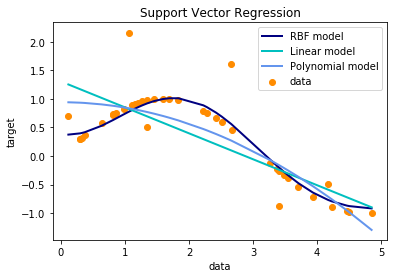

In [2]:
import numpy as np
from sklearn.svm import SVR
import matplotlib.pyplot as plt

###############################################################################
# Generate sample data
X = np.sort(5 * np.random.rand(40, 1), axis=0)
y = np.sin(X).ravel()

###############################################################################
# Add noise to targets
y[::5] += 3 * (0.5 - np.random.rand(8))

###############################################################################
# Fit regression model
svr_rbf = SVR(kernel='rbf', C=1e3, gamma=0.1)
svr_lin = SVR(kernel='linear', C=1e3)
svr_poly = SVR(kernel='poly', C=1e3, degree=2)
y_rbf = svr_rbf.fit(X, y).predict(X)
y_lin = svr_lin.fit(X, y).predict(X)
y_poly = svr_poly.fit(X, y).predict(X)

###############################################################################
# look at the results
lw = 2
plt.scatter(X, y, color='darkorange', label='data')
plt.hold('on')
plt.plot(X, y_rbf, color='navy', lw=lw, label='RBF model')
plt.plot(X, y_lin, color='c', lw=lw, label='Linear model')
plt.plot(X, y_poly, color='cornflowerblue', lw=lw, label='Polynomial model')
plt.xlabel('data')
plt.ylabel('target')
plt.title('Support Vector Regression')
plt.legend()
plt.show()

In [1]:
import tensorflow as tf
import numpy as np

# x and y are placeholders for our training data
x = tf.placeholder("float")
y = tf.placeholder("float")
# w is the variable storing our values. It is initialised with starting "guesses"
# w[0] is the "a" in our equation, w[1] is the "b"
w = tf.Variable([1.0, 2.0], name="w")
# Our model of y = a*x + b
y_model = tf.multiply(x, w[0]) + w[1]

# Our error is defined as the square of the differences
error = tf.square(y - y_model)
# The Gradient Descent Optimizer does the heavy lifting
train_op = tf.train.GradientDescentOptimizer(0.01).minimize(error)

# Normal TensorFlow - initialize values, create a session and run the model
model = tf.global_variables_initializer()

with tf.Session() as session:
    session.run(model)
    for i in range(1000):
        x_value = np.random.rand()
        y_value = x_value * 2 + 6
        session.run(train_op, feed_dict={x: x_value, y: y_value})

    w_value = session.run(w)
    print("Predicted model: {a:.3f}x + {b:.3f}".format(a=w_value[0], b=w_value[1]))

Predicted model: 2.276x + 5.848


In [3]:
# Make a prediction with coefficients
def predict(row, coefficients):
    yhat = coefficients[0]
    for i in range(len(row)-1):
        yhat += coefficients[i + 1] * row[i]
    return yhat

def coefficients_sgd(train, l_rate, n_epoch):
    coef = [0.0 for i in range(len(train[0]))]
    for epoch in range(n_epoch):
        sum_error = 0
        for row in train:
            yhat = predict(row, coef)
            error = yhat - row[-1]
            sum_error += error**2
            coef[0] = coef[0] - l_rate * error
            for i in range(len(row)-1):
                coef[i + 1] = coef[i + 1] - l_rate * error * row[i]
        print('>epoch=%d, lrate=%.3f, error=%.3f' % (epoch, l_rate, sum_error))
    return coef

dataset = [[1.23, 2.234], [2.234, 3.2674], [4.123, 3.234], [3.9876, 2.543], [5.1234, 6.234]]
l_rate = 0.001
n_epoch = 50
coef = coefficients_sgd(dataset, l_rate, n_epoch)
print(coef)

>epoch=0, lrate=0.001, error=68.387
>epoch=1, lrate=0.001, error=60.143
>epoch=2, lrate=0.001, error=52.985
>epoch=3, lrate=0.001, error=46.771
>epoch=4, lrate=0.001, error=41.376
>epoch=5, lrate=0.001, error=36.693
>epoch=6, lrate=0.001, error=32.627
>epoch=7, lrate=0.001, error=29.098
>epoch=8, lrate=0.001, error=26.034
>epoch=9, lrate=0.001, error=23.374
>epoch=10, lrate=0.001, error=21.065
>epoch=11, lrate=0.001, error=19.060
>epoch=12, lrate=0.001, error=17.320
>epoch=13, lrate=0.001, error=15.809
>epoch=14, lrate=0.001, error=14.498
>epoch=15, lrate=0.001, error=13.359
>epoch=16, lrate=0.001, error=12.371
>epoch=17, lrate=0.001, error=11.513
>epoch=18, lrate=0.001, error=10.769
>epoch=19, lrate=0.001, error=10.122
>epoch=20, lrate=0.001, error=9.561
>epoch=21, lrate=0.001, error=9.074
>epoch=22, lrate=0.001, error=8.651
>epoch=23, lrate=0.001, error=8.284
>epoch=24, lrate=0.001, error=7.965
>epoch=25, lrate=0.001, error=7.689
>epoch=26, lrate=0.001, error=7.448
>epoch=27, lrate=0

Epoch: 0050 cost= 0.107037410 W= 0.153023 b= 1.49619
Epoch: 0100 cost= 0.103577897 W= 0.158766 b= 1.45487
Epoch: 0150 cost= 0.100517213 W= 0.164168 b= 1.41601
Epoch: 0200 cost= 0.097809061 W= 0.169249 b= 1.37946
Epoch: 0250 cost= 0.095413089 W= 0.174027 b= 1.34509
Epoch: 0300 cost= 0.093293168 W= 0.178522 b= 1.31275
Epoch: 0350 cost= 0.091417551 W= 0.182749 b= 1.28234
Epoch: 0400 cost= 0.089758061 W= 0.186724 b= 1.25374
Epoch: 0450 cost= 0.088289693 W= 0.190464 b= 1.22684
Epoch: 0500 cost= 0.086990774 W= 0.19398 b= 1.20155
Epoch: 0550 cost= 0.085841410 W= 0.197287 b= 1.17775
Epoch: 0600 cost= 0.084824435 W= 0.200398 b= 1.15538
Epoch: 0650 cost= 0.083924472 W= 0.203324 b= 1.13433
Epoch: 0700 cost= 0.083128154 W= 0.206075 b= 1.11453
Epoch: 0750 cost= 0.082423434 W= 0.208664 b= 1.09591
Epoch: 0800 cost= 0.081799909 W= 0.211098 b= 1.0784
Epoch: 0850 cost= 0.081248075 W= 0.213387 b= 1.06193
Epoch: 0900 cost= 0.080759764 W= 0.215541 b= 1.04644
Epoch: 0950 cost= 0.080327660 W= 0.217566 b= 1.0

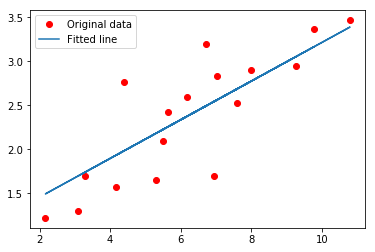

In [1]:
import tensorflow as tf
import numpy
import matplotlib.pyplot as plt
rng = numpy.random

learning_rate = 0.01
training_epochs = 1000
display_step = 50

train_X = numpy.asarray([3.3,4.4,5.5,6.71,6.93,4.168,9.779,6.182,7.59,2.167,
                         7.042,10.791,5.313,7.997,5.654,9.27,3.1])
train_Y = numpy.asarray([1.7,2.76,2.09,3.19,1.694,1.573,3.366,2.596,2.53,1.221,
                         2.827,3.465,1.65,2.904,2.42,2.94,1.3])
n_samples = train_X.shape[0]

X = tf.placeholder("float")
Y = tf.placeholder("float")

W = tf.Variable(rng.randn(), name="weight")
b = tf.Variable(rng.randn(), name="bias")
pred = tf.add(tf.multiply(X, W), b)
cost = tf.reduce_sum(tf.pow(pred-Y, 2))/(2*n_samples)
optimizer = tf.train.GradientDescentOptimizer(learning_rate).minimize(cost)
init = tf.global_variables_initializer()

with tf.Session() as sess:
    sess.run(init)
    for epoch in range(training_epochs):
        for (x, y) in zip(train_X, train_Y):
            sess.run(optimizer, feed_dict={X: x, Y: y})

        #Display logs per epoch step
        if (epoch+1) % display_step == 0:
            c = sess.run(cost, feed_dict={X: train_X, Y:train_Y})
            print("Epoch:", '%04d' % (epoch+1), "cost=", "{:.9f}".format(c),"W=", sess.run(W), "b=", sess.run(b))

    print("Optimization Finished!")
    training_cost = sess.run(cost, feed_dict={X: train_X, Y: train_Y})
    print("Training cost=", training_cost, "W=", sess.run(W), "b=", sess.run(b), '\n')
    
    #Graphic display
    plt.plot(train_X, train_Y, 'ro', label='Original data')
    plt.plot(train_X, sess.run(W) * train_X + sess.run(b), label='Fitted line')
    plt.legend()
    plt.show()